# Exploratory Data Analysis on cars dataset

look at dataset

remove unnecessary columns

handle missing values

In [16]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [17]:
# data
df_raw = pd.read_csv('./data/cars_raw.csv')
df_raw.head(5)

,Year,Make,Model,Used/New,Price,ConsumerRating,ConsumerReviews,SellerType,SellerName,SellerRating,...,InteriorColor,Drivetrain,MinMPG,MaxMPG,FuelType,Transmission,Engine,VIN,Stock#,Mileage
0,2019,Toyota,Sienna SE,Used,"$39,998",4.6,45,Dealer,CarMax Murrieta - Now offering Curbside Pickup...,3.3,...,Black,Front-wheel Drive,19,27,Gasoline,8-Speed Automatic,3.5L V6 24V PDI DOHC,5TDXZ3DC2KS015402,22998646,29403
1,2018,Ford,F-150 Lariat,Used,"$49,985",4.8,817,Dealer,Giant Chevrolet,4.8,...,Black,Four-wheel Drive,19,24,Gasoline,10-Speed Automatic,3.5L V6 24V PDI DOHC Twin Turbo,1FTEW1EG2JFD44217,22418A,32929
2,2017,RAM,1500 Laramie,Used,"$41,860",4.7,495,Dealer,Gill Auto Group Madera,4.6,...,Black,Four-wheel Drive,15,21,Gasoline,8-Speed Automatic,5.7L V8 16V MPFI OHV,1C6RR7VT5HS842283,NG277871G,23173
3,2021,Honda,Accord Sport SE,Used,"$28,500",5.0,36,Dealer,AutoSavvy Las Vegas,4.6,...,–,Front-wheel Drive,29,35,Gasoline,Automatic CVT,1.5L I4 16V GDI DOHC Turbo,1HGCV1F49MA038035,54237,10598
4,2020,Lexus,RX 350,Used,"$49,000",4.8,76,Dealer,Lexus of Henderson,4.8,...,Birch,Front-wheel Drive,20,27,Gasoline,8-Speed Automatic,3.5L V6 24V PDI DOHC,2T2AZMAA8LC156270,HDT4181A,28137


In [18]:
df_raw.sample(3)

,Year,Make,Model,Used/New,Price,ConsumerRating,ConsumerReviews,SellerType,SellerName,SellerRating,...,InteriorColor,Drivetrain,MinMPG,MaxMPG,FuelType,Transmission,Engine,VIN,Stock#,Mileage
4367,2019,RAM,1500 Laramie,Used,"$47,884",4.7,474,Dealer,Huffines Chrysler Jeep Dodge RAM Lewisville,4.8,...,Black,Four-wheel Drive,19,24,Gasoline,8-Speed Automatic,5.7L V8 16V MPFI OHV,1C6SRFJT7KN525340,22CL1136A,22939
1717,2019,Audi,Q8 3.0T Premium,Used,"$66,800",4.8,27,Dealer,ONYX Automotive,4.5,...,Black,All-wheel Drive,17,22,Gasoline,8-Speed Automatic,3.0L V6 24V GDI DOHC Turbo,WA1EVAF10KD020669,437308A,35848
8816,2019,BMW,530 i xDrive,Used,"$39,847",4.8,15,Dealer,Merrick Dodge Chrysler Jeep Ram,3.7,...,–,All-wheel Drive,23,33,Gasoline,8-Speed Automatic,2.0L I4 16V GDI DOHC Turbo,WBAJA7C59KWC77974,U3703,18297


In [19]:
df_raw.shape

(9379, 32)

In [20]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9379 entries, 0 to 9378
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   9379 non-null   int64  
 1   Make                   9379 non-null   object 
 2   Model                  9379 non-null   object 
 3   Used/New               9379 non-null   object 
 4   Price                  9379 non-null   object 
 5   ConsumerRating         9379 non-null   float64
 6   ConsumerReviews        9379 non-null   int64  
 7   SellerType             9379 non-null   object 
 8   SellerName             9379 non-null   object 
 9   SellerRating           9379 non-null   float64
 10  SellerReviews          9379 non-null   int64  
 11  StreetName             9379 non-null   object 
 12  State                  9379 non-null   object 
 13  Zipcode                9379 non-null   object 
 14  DealType               9157 non-null   object 
 15  Comf

In [21]:
df_raw.describe()

,Year,ConsumerRating,ConsumerReviews,SellerRating,SellerReviews,ComfortRating,InteriorDesignRating,PerformanceRating,ValueForMoneyRating,ExteriorStylingRating,ReliabilityRating,MinMPG,MaxMPG,Mileage
count,9379.000000,9379.000000,9379.000000,9379.000000,9379.000000,9379.000000,9379.000000,9379.000000,9379.000000,9379.000000,9379.000000,9379.000000,9379.000000,9379.000000
mean,2018.721719,4.702825,133.187014,4.412571,984.089988,4.771895,4.727391,4.696290,4.537083,4.782194,4.681746,22.755411,29.216548,37463.023350
std,2.221708,0.240795,154.985640,0.626258,1609.039864,0.217822,0.194391,0.253664,0.338098,0.171537,0.368161,14.812869,12.809783,24970.342569
min,2001.000000,2.500000,1.000000,1.000000,1.000000,3.000000,2.800000,1.000000,1.000000,3.000000,1.000000,0.000000,0.000000,121.000000
25%,2018.000000,4.700000,30.000000,4.300000,112.000000,4.700000,4.700000,4.600000,4.500000,4.700000,4.600000,18.000000,25.000000,18666.500000
50%,2019.000000,4.800000,75.000000,4.600000,542.000000,4.800000,4.800000,4.700000,4.600000,4.800000,4.800000,20.000000,27.000000,32907.000000
75%,2020.000000,4.800000,182.000000,4.800000,1272.000000,4.900000,4.800000,4.800000,4.700000,4.900000,4.900000,24.000000,31.000000,47698.000000
max,2022.000000,5.000000,817.000000,5.000000,27824.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,150.000000,133.000000,234114.000000


In [22]:
df_raw['Used/New'].value_counts()

Used/New
Used                       7900
BMW Certified               247
Mercedes-Benz Certified     223
Honda Certified             208
Toyota Certified            153
Cadillac Certified          105
Ford Certified               71
Subaru Certified             58
Jeep Certified               55
Nissan Certified             50
Acura Certified              47
Chevrolet Certified          40
Kia Certified                34
INFINITI Certified           34
Volvo Certified              33
Porsche Certified            25
RAM Certified                24
Buick Certified              20
Volkswagen Certified         17
GMC Certified                13
Dodge Certified              10
Alfa Romeo Certified          7
Bentley Certified             2
MINI Certified                1
Ferrari Certified             1
Maserati Certified            1
Name: count, dtype: int64

In [23]:
# count how many are NOT "Used"
new_count = df_raw[df_raw["Used/New"] != "Used"].shape[0]
used_count = df_raw[df_raw["Used/New"] == "Used"].shape[0]
print("Used:", used_count)
print("New:", new_count)

Used: 7900
New: 1479


### Visualizations

to see distribution 

to spot outliers

Text(0.5, 1.0, 'Consumer Ratings Distribution')

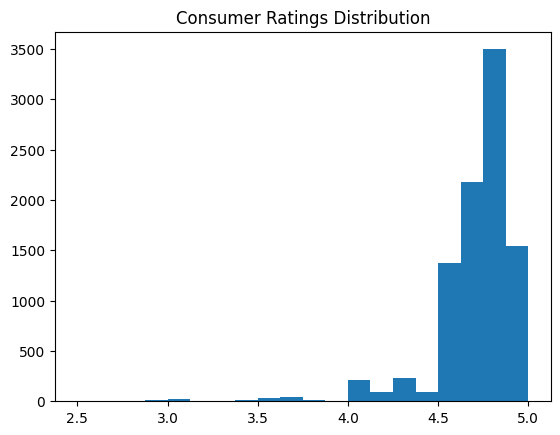

In [27]:
# heat map of consumer ratings
plt.hist(df_raw['ConsumerRating'], bins=20)
plt.title('Consumer Ratings Distribution')

Text(0.5, 1.0, 'Seller Ratings Distribution')

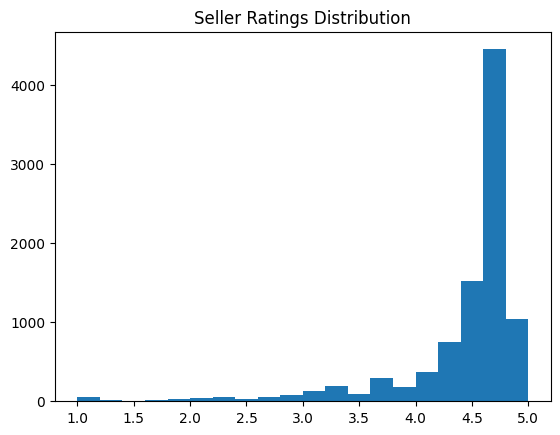

In [28]:
# heat map of Seller ratings
plt.hist(df_raw['SellerRating'], bins=20)
plt.title('Seller Ratings Distribution')

In [31]:
# seller ratings under 2
df_raw[df_raw['SellerRating'] < 2].shape

(131, 32)

In [58]:
df_raw[df_raw['SellerRating'] < 2].sample(3)

,Year,Make,Model,Used/New,Price,ConsumerRating,ConsumerReviews,SellerType,SellerName,SellerRating,...,InteriorColor,Drivetrain,MinMPG,MaxMPG,FuelType,Transmission,Engine,VIN,Stock#,Mileage
1195,2019,Acura,MDX 3.5L w/Advance Package,Used,"$37,988",4.6,63,Dealer,Certified Performance Motors,1.6,...,Ebony,All-wheel Drive,19,26,Gasoline,9-Speed Automatic,3.5L V6 24V GDI SOHC,5J8YD4H85KL024211,13560,19563
1087,2018,BMW,M550 i xDrive,Used,"$47,994",4.6,13,Dealer,Ourisman Super Center,1.0,...,Mocha,All-wheel Drive,16,25,Gasoline,8-Speed Automatic,4.4L V8 32V GDI DOHC Twin Turbo,WBAJB9C55JB036263,3559P,42989
7408,2018,BMW,320 i xDrive,Used,"$35,985",4.9,50,Dealer,Auto Use,1.4,...,Black,All-wheel Drive,23,34,Gasoline,8-SPEED A/T,4 Cylinder Engine,WBA8E5G56JNU45699,U45699,13682


## Preprocessing dataset

In [ ]:
df = df_raw.copy()

In [25]:

df["Used/New"] = df["Used/New"].apply(
    lambda x: "Used" if x == "Used" else "New"
)
df['Used/New'].value_counts()

Used/New
Used    7900
New     1479
Name: count, dtype: int64